## Modelo ML Spam

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import platform
print(platform.python_version())

3.9.13


In [10]:
def impressions(y_test,y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [21]:
import session_info
session_info.show()

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
data=data[['class','message']]
data.shape

(5572, 2)

In [14]:
x = np.array(data["message"])
y = np.array(data["class"])
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [15]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message: congratulation you have win a car!


['ham']


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



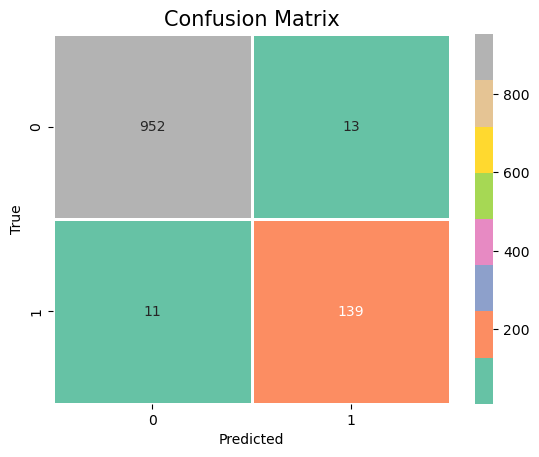

In [16]:
pred_y = clf.predict(X_test)
impressions(y_test, pred_y)

In [17]:
clf.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [20]:
#joblib.dump(clf, 'spam_clf_v1.pkl')